In [1]:
using MultiPoly
using Interact
using ProfileView
using PyPlot

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [17]:
reload("SpatialFields")

INFO: Recompiling stale cache file /home/rdeits/.julia/lib/v0.4/SpatialFields.ji for module SpatialFields.


In [44]:
import SoftRobots
reload("SoftRobots")

INFO: Precompiling module SoftRobots...


 30

before your program finished. To profile for longer runs, call Profile.init
with a larger buffer and/or larger delay.


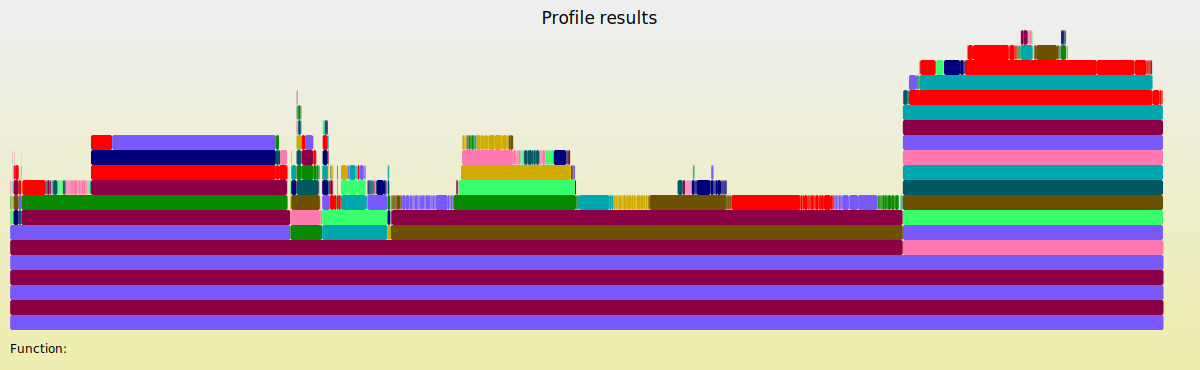

.996195 seconds (283.51 M allocations: 8.133 GB, 9.88% gc time)


In [50]:
world = SoftRobots.World3D()
world_state = Dict{SoftRobots.Object, SoftRobots.ObjectState}()

robots = []
for j = 1:2
    robot, robot_state = SoftRobots.blob(num_nodes=100, k=1000)
#     robot, robot_state = SoftRobots.tetrahedron()
    push!(robots, robot)
    for i = 1:length(robot_state.positions)
        robot_state.positions[i] += SoftRobots.Point(0., 0, 1.2*j)
    end
    push!(world.objects, robot)
    world_state[robot] = robot_state
end

x, y, z = generators(MPoly{Float64}, :x, :y, :z)
terrain = SoftRobots.FixedObject()
terrain_state = SoftRobots.FixedObjectState(0 + (0.0x^2  + 0.0y^2 + 1z))
push!(world.objects, terrain)
world_state[terrain] = terrain_state

history = SoftRobots.simulate(world, world_state, 0:0.0001:0.003, 
    draw_callback=SoftRobots.draw)
Profile.clear()
@time @profile history = SoftRobots.simulate(world, world_state, 0:0.0001:0.5, history_downsampling=10)
ProfileView.view()

In [51]:
@manipulate for i = 1:length(history)
    for j = 1:length(robots)
        SoftRobots.draw(world, history[i][2])
#         SoftRobots.draw(gl[j], robots[j], history[i][2][robots[j]])
#         SoftRobots.switch_buffer(gl[j])
    end
end

Interact.Slider{Int64}(Signal{Int64}(250, nactions=0),"i",250,1:500,true)

nothing